In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential

import sys
sys.path.insert(0,'..')

from core.Lie import LieLayer

Using TensorFlow backend.


Let's consider a simple polynomial regression of 2nd order: y=1.5+x+x*x

In [2]:
X = np.array(range(20))
Y = 1.5 + X + X*X

and split it into train and test data

In [3]:
X_train = X[:10]
Y_train = Y[:10]

X_test = X[10:]
Y_test = Y[10:]

To build a polynomial neural network that represents Lie transformation just use LieLayer as keras layer

In [4]:
inputDim  = 1
outputDim = 1
order     = 2 #order or Lie transform

model = Sequential()
model.add(LieLayer(output_dim = outputDim, order=order, input_shape = (inputDim,)))
opt = keras.optimizers.Adamax(lr=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer='adam')

and fit data

In [7]:
model.fit(X_train, Y_train, nb_epoch=10000, verbose=0)
print('completed')

completed


One can draw results

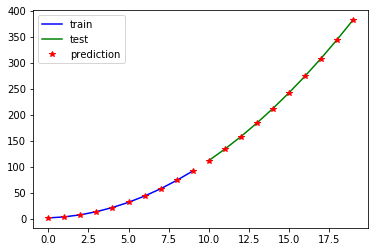

In [8]:
ax = plt.subplot(1,1,1)
    
ax.plot(X_train, Y_train, 'b-', label='train')
ax.plot(X_train, model.predict(X_train), 'r*')
    
ax.plot(X_test, Y_test, 'g-', label='test')
ax.plot(X_test, model.predict(X_test), 'r*', label='prediction')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()